In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def read_data(file):
    data=np.loadtxt(file)
    mjd = data[:,0]
    res = data[:,1]
    res_err = data[:,2]*1e-6
    return [mjd, res, res_err]

In [9]:
res_jb = read_data('jb_res.txt')
res_mk = read_data('mk_res.txt')

In [10]:
def read_data(fil, analysis):
    if analysis == 'Bayes' :
        data = np.loadtxt(fil)
        mjd = data[:,0]
        nudot = data[:,3]*1e-15
        nudot_err = data[:,4]*1e-15
    if analysis == 'fitwaves':
        data = np.loadtxt(fil)
        mjd = data[:,0]
        nudot = data[:,1]
        nudot_err = data[:,2]
    return [mjd, nudot, nudot_err]

In [11]:
data_bayes1 = read_data('nudot.jbo.bayes.asc', analysis='Bayes')
data_bayes2 = read_data('nudot.mk.bayes.asc', analysis='Bayes')
data_bayes3 = read_data('nudot.comb.bayes.asc', analysis='Bayes')
data_fitwaves = read_data('nudot.mk.fitwaves.txt', analysis='fitwaves')

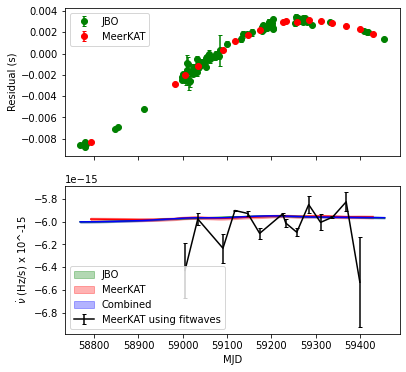

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 6))

plt.subplot(2,1,1)
plt.errorbar(res_jb[0], res_jb[1], yerr=res_jb[2], color='g', capsize=2, fmt="o", label='JBO')
plt.errorbar(res_mk[0], res_mk[1], yerr=res_mk[2], color='r', capsize=2, fmt="o", label='MeerKAT')
plt.legend()
plt.ylabel('Residual (s)')

plt.subplot(2,1,2)
upper_error = data_bayes1[1] + data_bayes1[2]
lower_error = data_bayes1[1] - data_bayes1[2]
plt.plot(data_bayes1[0], data_bayes1[1], color='green')
plt.fill_between(data_bayes1[0], upper_error, lower_error, color='green', alpha=0.3, label='JBO')

upper_error = data_bayes2[1] + data_bayes2[2]
lower_error = data_bayes2[1] - data_bayes2[2]
plt.plot(data_bayes2[0], data_bayes2[1], color='red')
plt.fill_between(data_bayes2[0], upper_error, lower_error, color='red', alpha=0.3, label='MeerKAT')


upper_error = data_bayes3[1] + data_bayes3[2]
lower_error = data_bayes3[1] - data_bayes3[2]
plt.plot(data_bayes3[0], data_bayes3[1], color='blue')
plt.fill_between(data_bayes3[0], upper_error, lower_error, color='blue', alpha=0.3, label='Combined')

plt.errorbar(data_fitwaves[0], data_fitwaves[1], yerr=data_fitwaves[2], color='k', capsize=2, label='MeerKAT using fitwaves')

plt.legend()
plt.ylabel(r'$\dot\nu$ (Hz/s) x 10^-15')
plt.xlabel('MJD')

plt.savefig("final.pdf")
plt.show()